### Importazione librerie e caricamento dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('../dataset/races.csv')

# pulizia dati
print("Informazioni del dataset:\n", df.info())
print("\nValori mancanti:\n", df.isnull().sum())
df = df.dropna() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

### Informazioni statistiche di base

In [3]:
df.describe()

,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist_age,delta
count,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000
mean,86.953346,138.313420,171523.832016,2621.882549,2.845320,986.634380,21.808526,73.770826,28.883854,559.986732
std,52.048909,126.143438,44815.033415,1248.523555,1.469933,333.743372,5.877342,44.814586,4.476648,658.432155
min,20.000000,14.000000,6820.000000,3.000000,1.000000,156.000000,10.000000,0.000000,19.000000,0.000000
25%,50.000000,60.000000,162300.000000,1831.000000,2.000000,781.000000,17.000000,35.000000,25.000000,25.000000
50%,80.000000,100.000000,176900.000000,2617.000000,2.000000,835.000000,22.000000,72.000000,29.000000,273.000000
75%,100.000000,180.000000,193800.000000,3485.000000,5.000000,1044.000000,26.000000,110.000000,32.000000,922.500000
max,350.000000,800.000000,294000.000000,5852.000000,5.000000,1584.000000,36.000000,179.000000,42.000000,3191.000000


### Distribuzione variabili numeriche

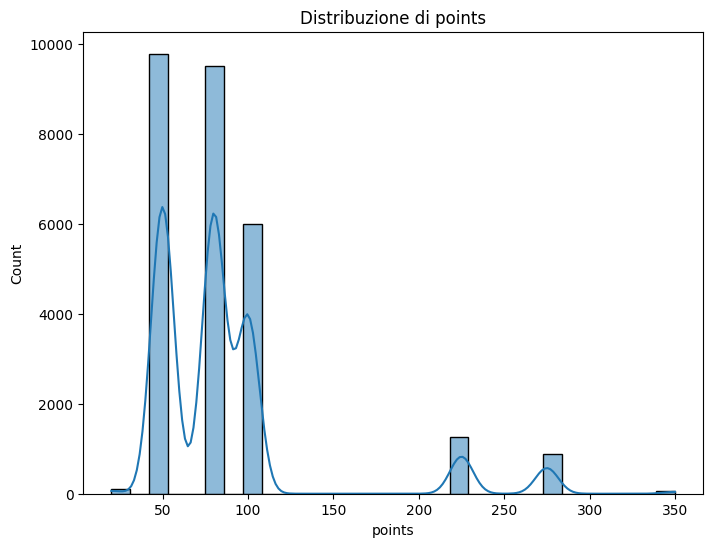

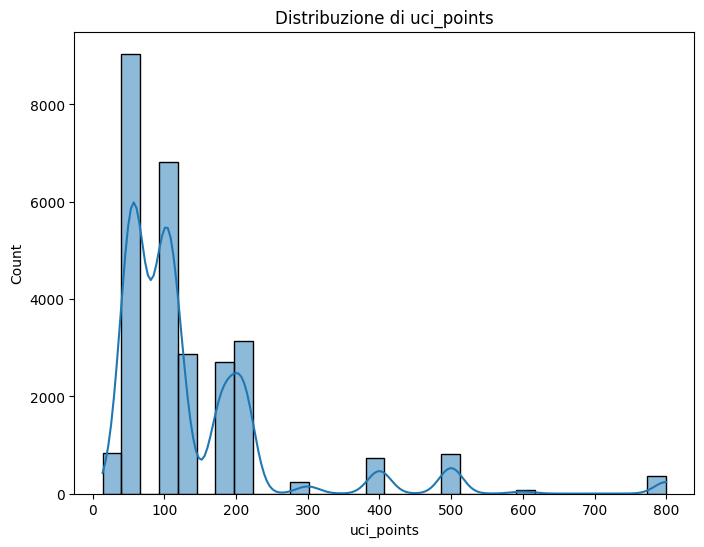

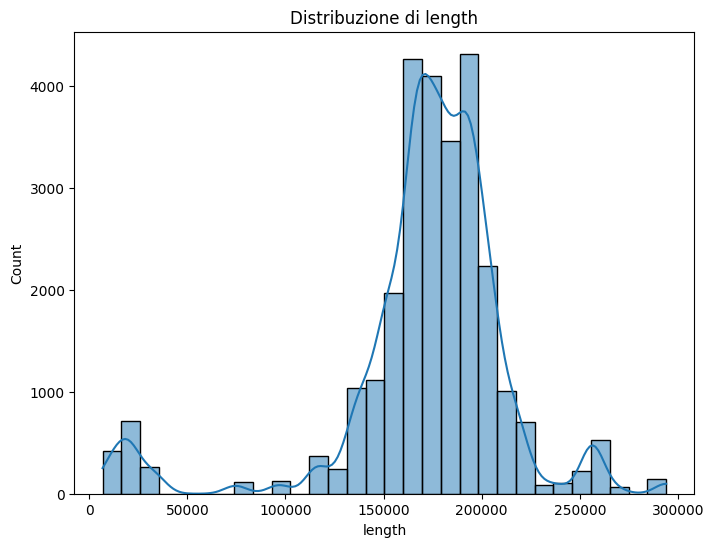

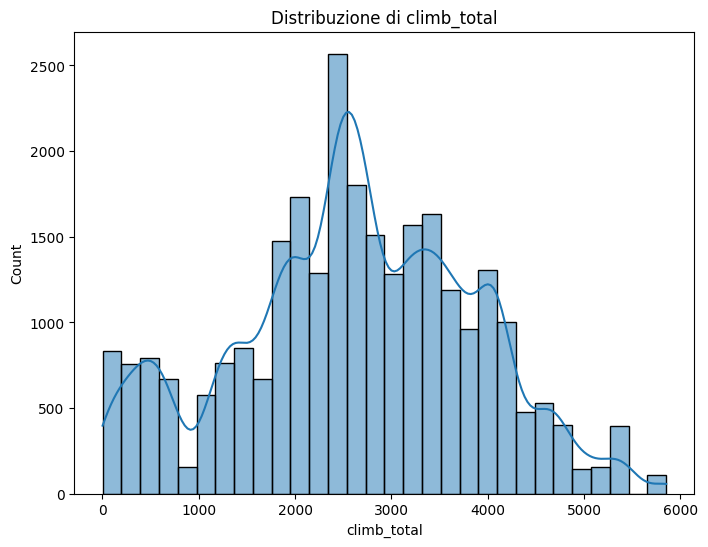

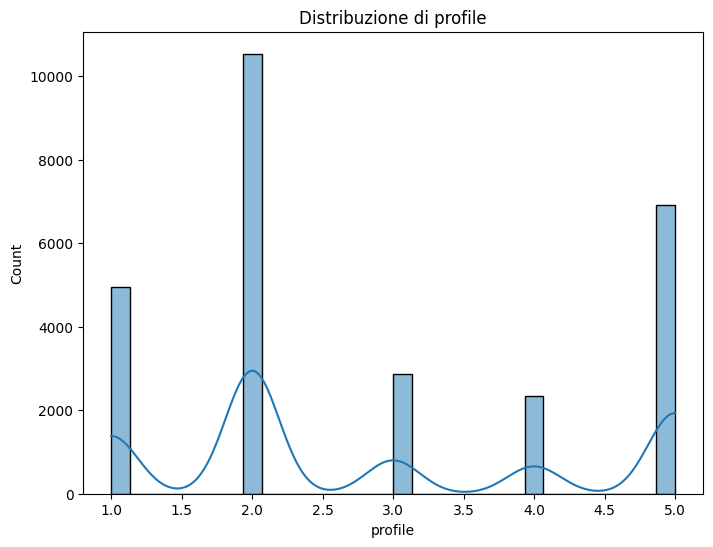

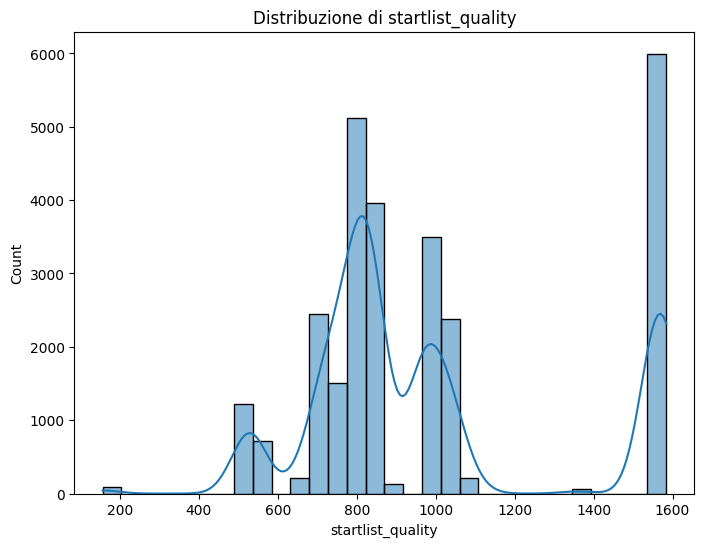

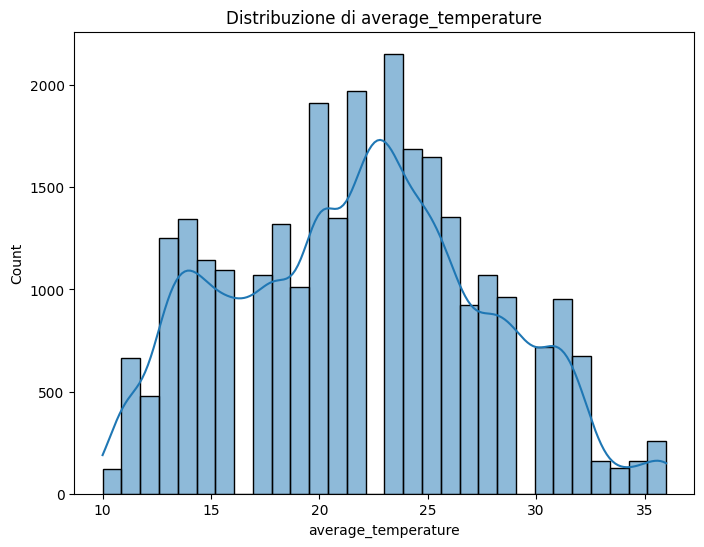

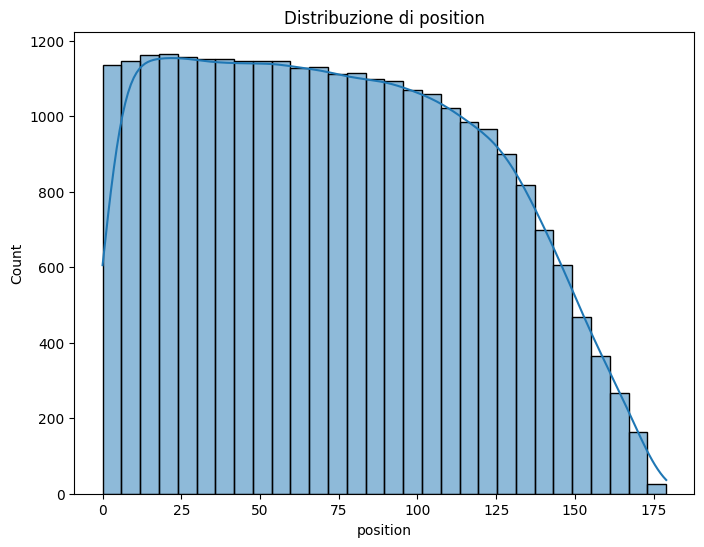

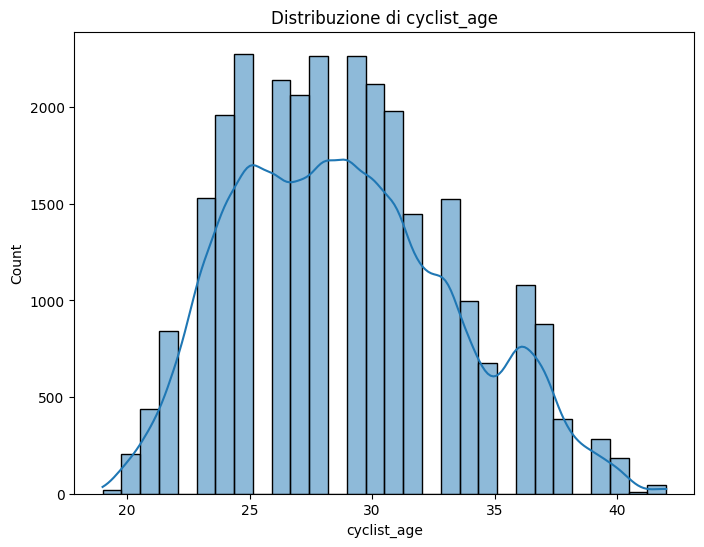

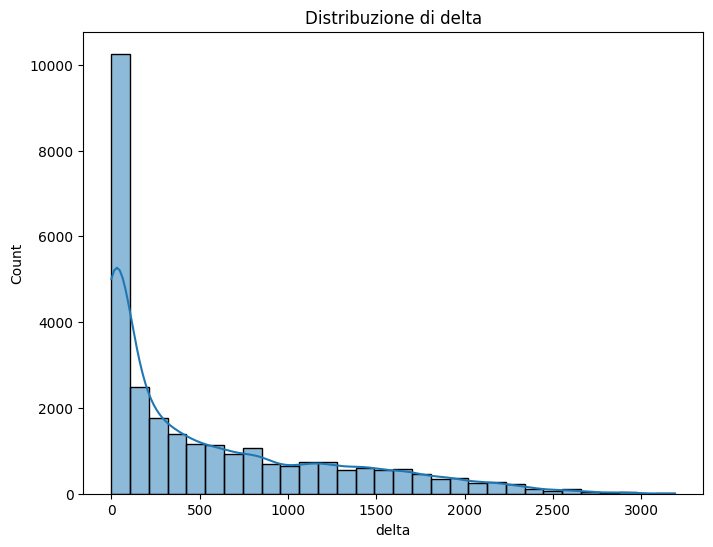

In [4]:
numeric_columns = df.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuzione di {col}')
    plt.show()


### Distribuzione variabili categoriche

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribuzione delle categorie in {col}')
    plt.xticks(rotation=45)
    plt.show()

### Normalizzazione

In [ ]:
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include='number').columns
normalized_df = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
print("DataFrame Normalizzato:")
print(normalized_df)

### Nuove distribuzioni

In [ ]:
numeric_columns = normalized_df.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(normalized_df[col], kde=True, bins=30)
    plt.title(f'Distribuzione di {col}')
    plt.show()

### Standardizzazione

In [ ]:
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include='number').columns
standardized_df = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
print("\nDataFrame Standardizzato:")
print(standardized_df)

### Nuove distribuzioni

In [ ]:
numeric_columns = standardized_df.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(standardized_df[col], kde=True, bins=30)
    plt.title(f'Distribuzione di {col}')
    plt.show()

### Correlazioni tra variabili numeriche

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

In [ ]:
methods = ['pearson', 'spearman', 'kendall']
for method in methods:
    correlation_matrix = df[numeric_columns].corr(method=method)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title(f'Heatmap delle correlazioni ({method.capitalize()})')
    plt.show()

### Pair plot (relazioni tra variabili numeriche)

In [ ]:
sns.pairplot(df[numeric_columns])
plt.show()

### Alcune relazioni fra features

In [ ]:
# Relazione tra età dei ciclisti e posizioni in gara
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cyclist_age', y='position')
plt.title('Relazione tra età dei ciclisti e posizioni in gara')
plt.xlabel('Età del ciclista')
plt.ylabel('Posizione in gara')
plt.show()

In [ ]:
# Impatto del team di appartenenza sulla performance dei ciclisti
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='cyclist_team', y='position')
plt.title('Impatto del team di appartenenza sulla performance dei ciclisti')
plt.xlabel('Team del ciclista')
plt.ylabel('Posizione in gara')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Impatto delle diverse superfici sui tempi di gara e posizioni finali
surface_columns = ['is_tarmac', 'is_cobbled', 'is_gravel']
for surface in surface_columns:
    if surface in df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=surface, y='position')
        plt.title(f'Impatto della superficie {surface} sui tempi di gara e posizioni finali')
        plt.xlabel(surface)
        plt.ylabel('Posizione in gara')
        plt.show()

In [ ]:
# Analisi delle Prestazioni per Età
age_bins = [18, 25, 30, 35, 40, 50]
df['age_group'] = pd.cut(df['cyclist_age'], bins=age_bins)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='position')
plt.title('Prestazioni per fasce d\'età')
plt.xlabel('Fascia d\'età')
plt.ylabel('Posizione in gara')
plt.show()
